<b>Student Name: </b>Yogesh Kumar Verma<br>
<b>Student ID:</b> x21177112<br>
<b>Student Email ID:</b> x21177112@student.ncirl.ie <br>
<b>Subject:</b>Database and Analytics Programming<br>
<b>College:</b> National College of Ireland

### Analysis Steps are as follows:<br>

1. Data Collection<br>
2. Storing of Data in MongoDB<br>
3. Retriving Data from MongoDB for further analysis<br>
4. Data Exploration,Data Cleaup and Preparation<br>
5. Data Visualisation<br>
6. Results and Conclusions<br>

1. Data Collection has follow steps

1a. Importing required libraries <br>
1b. Loading Twitter Developer account login(Key and Secret) <br>
1c. Twitter API Authentication  <br>
1d. Pulling Tweets from Twitter using Search_Tweet API for Tesco <br>
1e. Create Dataset for Analysis

1a. Importing required libraries

Libraries are collection of modules. We can use these modules to perform our task. 
Here we will import all the required libraries which will be used in the project.

In [19]:
import tweepy 
from tweepy import OAuthHandler
import nltk
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import pymongo
from pymongo import MongoClient
import pandas.io.sql as sqlio
import psycopg2
import csv
import datetime
import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import emoji



1b. Loading Twitter Developer account login(Key and Secret)<br>
We need to create an Account on Twitter Developer Portal and then generate key,secret,access token and access token secret <br>
I have saved these into an csv file and read it from here and storing into different variables<br>

In [832]:
login_data=pd.read_csv('.\login.csv',encoding = "utf-8")

In [492]:
consumer_key=login_data['Key'][0]
consumer_secret=login_data['Key'][1]
access_token=login_data['Key'][3]
access_token_secret=login_data['Key'][4]


1c. Twitter API Authentication 

In [493]:
authenticate = tweepy.OAuthHandler(consumer_key,consumer_secret)
authenticate.set_access_token(access_token,access_token_secret)

api = tweepy.API(authenticate, wait_on_rate_limit=True)
print("Your account authentication to Twitter API is successfully and API is ready to use")

Your account authentication to Twitter API is successfully and API is ready to use


1d. Pulling Tweets from Twitter using Search_Tweet API for Tesco <br>
3000 Tesco tagged Tweets are queried excluding Retweets for analysis

In [494]:
posts=[tweet for tweet in tweepy.Cursor(api.search_tweets,q='@Tesco -filter:retweets',lang="en",count=3000).items()]

Reading first 5 Tweets data for quick confirmation of posted tweets

In [495]:
i=1
for tweet in posts[:5]:
    print(str(i)+ "=",tweet.user.name,tweet.user.verified,tweet.user.location,tweet.created_at,tweet.text)
    i=i+1

1= 🌷🎀 Heidi 🎀🌷 False UK 2022-04-12 19:34:45+00:00 @Tesco @MaltesersUK @thorntonschocs Maltesers #YoursForTheMaking
2= 🐝 ❤Sandra Bee❤🐝 False London, England 2022-04-12 19:34:35+00:00 @gappersonnel @Tesco I eat the luscious filling first. 🥚
#HowDoYouEatYours
3= Maddz False  2022-04-12 19:34:28+00:00 @Tesco Thanks will do
4= Victoria Kaye False  2022-04-12 19:34:09+00:00 @Tesco @MaltesersUK @thorntonschocs #YoursForTheMaking… Malteasers without a doubt 🐰 🐣 💕
5= Tim Fisher False Caterham, Surrey 2022-04-12 19:33:03+00:00 @STU_ACTOR @Tesco And his Pac man game too, sweet


1e. Create Dataset for Analysis<br>
create a list of records<br>
Iterate over each tweet to get corresponding user details<br>

In [496]:
tweet_detail_list = []
for tweet in posts:
    tweet_detail={
        'user_name':tweet.user.name,
        'user_verified':tweet.user.verified,
        'location':tweet.user.location,
        'created_at':tweet.created_at,
        'text':tweet.text
    }
    tweet_detail_list.append(tweet_detail)

Create dataframe from the extracted records

In [497]:
tweets_df = pd.DataFrame(tweet_detail_list)

Display the dataframe

In [501]:
tweets_df

user_name  user_verified  \
0                                 🌷🎀 Heidi 🎀🌷          False   
1                             🐝 ❤Sandra Bee❤🐝          False   
2                                       Maddz          False   
3                               Victoria Kaye          False   
4                                  Tim Fisher          False   
...                                       ...            ...   
13869  House Martin Conservation UK & Ireland          False   
13870                           Smart Monkey🔻          False   
13871                        Thomas Skinner ⚒          False   
13872                         Jasmine Telling          False   
13873                      Kirsty Macfarlane🌸          False   

                    location                created_at  \
0                         UK 2022-04-12 19:34:45+00:00   
1            London, England 2022-04-12 19:34:35+00:00   
2                            2022-04-12 19:34:28+00:00   
3                            2022-04-12 19:34:09+00:00   
4           Caterham, Surrey 2022-04-12 19:33:03+00:00   
...                      ...                       ...   
13869             UK/Ireland 2022-04-04 13:24:38+00:00   
13870  3rd rock from the Sun 2022-04-04 13:22:26+00:00   
13871        London, England 2022-04-04 13:22:11+00:00   
13872                        2022-04-04 13:21:50+00:00   
13873                        2022-04-04 13:17:59+00:00   

                                                    text  
0      @Tesco @MaltesersUK @thorntonschocs Maltesers ...  
1      @gappersonnel @Tesco I eat the luscious fillin...  
2                                  @Tesco Thanks will do  
3      @Tesco @MaltesersUK @thorntonschocs #YoursForT...  
4      @STU_ACTOR @Tesco And his Pac man game too, sweet  
...                                                  ...  
13869  An open letter to Ken Murphy, CEO of Tesco, UK...  
13870  @adrianbowyer @Tesco @Morrisons Just guessing ...  
13871  @TPAMASSIVE @Tesco That just really made me la...  
13872  @Tesco waiting on a delivery that was due betw...  
13873  @Anne90344984 @tractorgirly @JimFairlieLogie @...  

[13874 rows x 5 columns]

Display the Twitter dataframe,Total rows and columns count

In [498]:
RowCount, ColCount = tweets_df.shape
print(f'There are {RowCount} rows and {ColCount} columns')

There are 13874 rows and 5 columns


Storing Twitter dataframe to a CSV File to use it export into MongoDB Database

In [502]:
tweets_df.to_csv('{}.csv'.format("TwitterTesco-data"),index=False)

2. Storing the DataFrame in MongoDB

It has follow steps.<br>
2a. Read csv file created in last step and create a dictionary, document format, json.<br>
2b. Connect MongoDB database using Client, Connect localhost mongoDB with ports 27017.<br>
2c. Import into Database (twitter_db) and collection,table(twitter_table).<br>

In [506]:
#Importing the CSV File created above into MongoDB Database.
#db: Creates a connection on localhost mongoDB with ports 27017
Twitter_file_path = r".\TwitterTesco-data.csv"

db = MongoClient("mongodb://%s:%s@127.0.0.1" % ("dap", "dap"))

def csv_to_json(filename, header=None):
    data = pd.read_csv(filename, header=header)
    return data.to_dict('records')

# Drop Table/Collection if already present or importing same data again.
db.twitter_db.twitter_table.drop()

# Storing Data in twitter_database in location collection 
db.twitter_db.twitter_table.insert_many(csv_to_json(Twitter_file_path, header=0))

print("Your CSV file has been imported successfully in 'twitter database' in 'Twitter data' collection")

Your CSV file has been imported successfully in 'twitter database' in 'Twitter data' collection


3. Retrieving data from MongoDB

It has follow steps.<br>
3a. Connect MongoDB database using Client, Connect localhost mongoDB with ports 27017.<br>
3b. Read and store collection(Table) from database.<br>
3c. Create panda dataframe.<br>

In [507]:
#Extract the data from collection name location fro further analysis.
#Tweet_md_collection: Store collection named loction from mongoDB
#Tweet_md: Find all the documents present in the collection
#Tweet_dict: Create an empty directory
#Tweet_md_df: Store documents as Dataframe

db = MongoClient("mongodb://%s:%s@127.0.0.1" % ("dap", "dap"))
Tweet_md_collection = db.twitter_db["twitter_table"]
Tweet_md = Tweet_md_collection.find()
Tweet_dict = {}
Tweet_md_df = pd.DataFrame(list(Tweet_md))

Display the Dataframe,Total rows and columns count

In [508]:
RowCount, ColCount = Tweet_md_df.shape
print(f'There are {RowCount} rows and {ColCount} columns')
print("Data from MongoDB Database is read successfully into Python Dataframe")

There are 13874 rows and 6 columns
Data from MongoDB Database is read successfully into Python Dataframe


4. Data Exploration, Data Cleanup and Preparation

It has follow steps.<br>
4a. Data stats, Using Regular expression to cleanup Tweet text.<br>
4b. Create new date column from created_at field.<br>
4c. Create 3 new column Subjectivity,Polarity and Sentiment based on Polarity score(Positive,Negative,Neutral).<br>
4d. List of Positive tweets by users.<br>
4e. List of Negative tweets by users.<br>

In [509]:
# 4a. Data stats
Tweet_md_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13874 entries, 0 to 13873
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   _id            13874 non-null  object
 1   user_name      13874 non-null  object
 2   user_verified  13874 non-null  bool  
 3   location       9215 non-null   object
 4   created_at     13874 non-null  object
 5   text           13874 non-null  object
dtypes: bool(1), object(5)
memory usage: 555.6+ KB


In [510]:
# 4a.Data stats
Tweet_md_df.describe()

_id                 user_name user_verified  \
count                      13874                     13874         13874   
unique                     13874                      6378             2   
top     6255da29e868f522af2c6d4f  Rosie 'second-hand' Posy         False   
freq                           1                       246         13646   

              location                 created_at  \
count             9215                      13874   
unique            2241                      12908   
top     United Kingdom  2022-04-12 16:01:09+00:00   
freq               436                          5   

                                                     text  
count                                               13874  
unique                                              11947  
top     @Tesco @reeses @thorntonschocs Thorntons #Your...  
freq                                                  197

In [511]:
Tweet_md_df.head(2)

_id        user_name  user_verified         location  \
0  6255da29e868f522af2c6d4f      🌷🎀 Heidi 🎀🌷          False               UK   
1  6255da29e868f522af2c6d50  🐝 ❤Sandra Bee❤🐝          False  London, England   

                  created_at  \
0  2022-04-12 19:34:45+00:00   
1  2022-04-12 19:34:35+00:00   

                                                text  
0  @Tesco @MaltesersUK @thorntonschocs Maltesers ...  
1  @gappersonnel @Tesco I eat the luscious fillin...

4a. Tweet text Data cleaup

load words and stopwords from nltk library which will be used in Tweet data cleanup

In [20]:
nltk.download('stopwords',quiet=True)
stopwords = nltk.corpus.stopwords.words('english')

nltk.download('words', quiet=True)
words = nltk.corpus.words.words()

In [716]:
print(stopwords[:50])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be']


In [717]:
print(words[:50])

['A', 'a', 'aa', 'aal', 'aalii', 'aam', 'Aani', 'aardvark', 'aardwolf', 'Aaron', 'Aaronic', 'Aaronical', 'Aaronite', 'Aaronitic', 'Aaru', 'Ab', 'aba', 'Ababdeh', 'Ababua', 'abac', 'abaca', 'abacate', 'abacay', 'abacinate', 'abacination', 'abaciscus', 'abacist', 'aback', 'abactinal', 'abactinally', 'abaction', 'abactor', 'abaculus', 'abacus', 'Abadite', 'abaff', 'abaft', 'abaisance', 'abaiser', 'abaissed', 'abalienate', 'abalienation', 'abalone', 'Abama', 'abampere', 'abandon', 'abandonable', 'abandoned', 'abandonedly', 'abandonee']


4a. Tweet text Data cleaup function

keys elements - 
1. Clean up Special character<br>
2. clean up http,https<br>
3. clean up : or # hastags<br>
4. clean up apostrophes<br>
5. clean up words like RT, DING<br>
6. clean up and use only english words<br>
7. clean up to remove stopwords<br>


In [723]:
# Data preprocessing cleaup function on tweet data

def cleanTxt(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text) #Remove @ sign
    text=re.sub(r'#','',text) #Remove # sign
    text=re.sub(r'RT[\s]+','',text) #Remove RT sign
    text=re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "",text) #Remove http links
    text=re.sub(r'[^\w\s]', '',text) #Remove punctuation 
    text=re.sub(r"'",'',text)
    text=re.sub(r"’",'',text)
    text=re.sub(r"_",'',text)
    text=re.sub(r':','',text) #Remove : sign
    text=re.sub(r'[DING]','',text) #Remove : sign
#    text = " ".join(text.split())
    text = ''.join(c for c in text if c not in emoji.UNICODE_EMOJI) #Remove Emojis
    text = text.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    text = " ".join(w for w in nltk.wordpunct_tokenize(text) \
         if w.lower() in words or not w.isalpha()) #Remove non-english tweets 
    text = " ".join(x for x in nltk.wordpunct_tokenize(text) \
         if x.lower() not in stopwords) #Remove Stopwords from tweets 
   
    return text


In [724]:
# Applying Cleanup function on Tweet text and store it into a new column Cleaned Text in same dataframe.
Tweet_md_df['cleaned_text']=Tweet_md_df['text'].apply(cleanTxt)

In [726]:
# display the dataframe after cleanup
Tweet_md_df.head(10)

_id        user_name  user_verified          location  \
0  6255da29e868f522af2c6d4f      🌷🎀 Heidi 🎀🌷          False                UK   
1  6255da29e868f522af2c6d50  🐝 ❤Sandra Bee❤🐝          False   London, England   
2  6255da29e868f522af2c6d51            Maddz          False               NaN   
3  6255da29e868f522af2c6d52    Victoria Kaye          False               NaN   
4  6255da29e868f522af2c6d53       Tim Fisher          False  Caterham, Surrey   
5  6255da29e868f522af2c6d54      cathylouise          False    United Kingdom   
6  6255da29e868f522af2c6d55     The Log Lady          False        London, UK   
7  6255da29e868f522af2c6d56            Maddz          False               NaN   
8  6255da29e868f522af2c6d57    Sarah Edwards          False               NaN   
9  6255da29e868f522af2c6d58      cathylouise          False    United Kingdom   

                 created_at  \
0 2022-04-12 19:34:45+00:00   
1 2022-04-12 19:34:35+00:00   
2 2022-04-12 19:34:28+00:00   
3 2022-04-12 19:34:09+00:00   
4 2022-04-12 19:33:03+00:00   
5 2022-04-12 19:32:58+00:00   
6 2022-04-12 19:32:48+00:00   
7 2022-04-12 19:31:00+00:00   
8 2022-04-12 19:30:43+00:00   
9 2022-04-12 19:30:38+00:00   

                                                text  \
0  @Tesco @MaltesersUK @thorntonschocs Maltesers ...   
1  @gappersonnel @Tesco I eat the luscious fillin...   
2                              @Tesco Thanks will do   
3  @Tesco @MaltesersUK @thorntonschocs #YoursForT...   
4  @STU_ACTOR @Tesco And his Pac man game too, sweet   
5  @Tesco @MaltesersUK @thorntonschocs Thorntons ...   
6  Supermarkets need to step up. Please sell chic...   
7  @Tesco how long will the deal be on for lego s...   
8  @Tesco @MaltesersUK @thorntonschocs #YoursForT...   
9                           @Tesco Aww I missed it 😭   

                                        cleaned_text created_date  \
0                                                      2022-04-12   
1                         eat luscious filling first   2022-04-12   
2                                             Thanks   2022-04-12   
3                                      without doubt   2022-04-12   
4                           ACTOR Pac man game sweet   2022-04-12   
5                                                      2022-04-12   
6  need step Please sell chicken turkey neck chic...   2022-04-12   
7                    long deal star around town sold   2022-04-12   
8                                         definitely   2022-04-12   
9                                                      2022-04-12   

   subjectivity  polarity  Analysis  
0      0.000000     0.000   Neutral  
1      0.333333     0.250  Positive  
2      0.200000     0.200  Positive  
3      0.000000     0.000   Neutral  
4      0.525000    -0.025  Negative  
5      0.000000     0.000   Neutral  
6      0.950000    -0.600  Negative  
7      0.400000    -0.050  Negative  
8      0.500000     0.000   Neutral  
9      0.000000     0.000   Neutral

4b. Create new date column from created_at field

In [729]:
Tweet_md_df['created_at'] = pd.to_datetime(Tweet_md_df['created_at'], errors='coerce')
Tweet_md_df['created_date'] = Tweet_md_df['created_at'].dt.date

In [730]:
Tweet_md_df.head(5)

_id        user_name  user_verified          location  \
0  6255da29e868f522af2c6d4f      🌷🎀 Heidi 🎀🌷          False                UK   
1  6255da29e868f522af2c6d50  🐝 ❤Sandra Bee❤🐝          False   London, England   
2  6255da29e868f522af2c6d51            Maddz          False               NaN   
3  6255da29e868f522af2c6d52    Victoria Kaye          False               NaN   
4  6255da29e868f522af2c6d53       Tim Fisher          False  Caterham, Surrey   

                 created_at  \
0 2022-04-12 19:34:45+00:00   
1 2022-04-12 19:34:35+00:00   
2 2022-04-12 19:34:28+00:00   
3 2022-04-12 19:34:09+00:00   
4 2022-04-12 19:33:03+00:00   

                                                text  \
0  @Tesco @MaltesersUK @thorntonschocs Maltesers ...   
1  @gappersonnel @Tesco I eat the luscious fillin...   
2                              @Tesco Thanks will do   
3  @Tesco @MaltesersUK @thorntonschocs #YoursForT...   
4  @STU_ACTOR @Tesco And his Pac man game too, sweet   

                 cleaned_text created_date  subjectivity  polarity  Analysis  
0                               2022-04-12      0.000000     0.000   Neutral  
1  eat luscious filling first   2022-04-12      0.333333     0.250  Positive  
2                      Thanks   2022-04-12      0.200000     0.200  Positive  
3               without doubt   2022-04-12      0.000000     0.000   Neutral  
4    ACTOR Pac man game sweet   2022-04-12      0.525000    -0.025  Negative

4c. Create 3 new column Subjectivity,Polarity and Sentiment based on Polarity score(Positive,Negative,Neutral)

In [731]:
# Create two function and add 2 news columns, subjectivity and polarity

def getsubjecttivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

Tweet_md_df['subjectivity']=Tweet_md_df['cleaned_text'].apply(getsubjecttivity)
Tweet_md_df['polarity']=Tweet_md_df['cleaned_text'].apply(getPolarity)

In [732]:
# create function to compute sentiment analysis based on polarity value.

def getAnalysis(score):
    if score<0.000:
        return 'Negative'
    elif score==0.000:
        return 'Neutral'
    else:
        return 'Positive'
    
Tweet_md_df['Analysis']=Tweet_md_df['polarity'].apply(getAnalysis)

In [733]:
Tweet_md_df[0:10]

_id        user_name  user_verified          location  \
0  6255da29e868f522af2c6d4f      🌷🎀 Heidi 🎀🌷          False                UK   
1  6255da29e868f522af2c6d50  🐝 ❤Sandra Bee❤🐝          False   London, England   
2  6255da29e868f522af2c6d51            Maddz          False               NaN   
3  6255da29e868f522af2c6d52    Victoria Kaye          False               NaN   
4  6255da29e868f522af2c6d53       Tim Fisher          False  Caterham, Surrey   
5  6255da29e868f522af2c6d54      cathylouise          False    United Kingdom   
6  6255da29e868f522af2c6d55     The Log Lady          False        London, UK   
7  6255da29e868f522af2c6d56            Maddz          False               NaN   
8  6255da29e868f522af2c6d57    Sarah Edwards          False               NaN   
9  6255da29e868f522af2c6d58      cathylouise          False    United Kingdom   

                 created_at  \
0 2022-04-12 19:34:45+00:00   
1 2022-04-12 19:34:35+00:00   
2 2022-04-12 19:34:28+00:00   
3 2022-04-12 19:34:09+00:00   
4 2022-04-12 19:33:03+00:00   
5 2022-04-12 19:32:58+00:00   
6 2022-04-12 19:32:48+00:00   
7 2022-04-12 19:31:00+00:00   
8 2022-04-12 19:30:43+00:00   
9 2022-04-12 19:30:38+00:00   

                                                text  \
0  @Tesco @MaltesersUK @thorntonschocs Maltesers ...   
1  @gappersonnel @Tesco I eat the luscious fillin...   
2                              @Tesco Thanks will do   
3  @Tesco @MaltesersUK @thorntonschocs #YoursForT...   
4  @STU_ACTOR @Tesco And his Pac man game too, sweet   
5  @Tesco @MaltesersUK @thorntonschocs Thorntons ...   
6  Supermarkets need to step up. Please sell chic...   
7  @Tesco how long will the deal be on for lego s...   
8  @Tesco @MaltesersUK @thorntonschocs #YoursForT...   
9                           @Tesco Aww I missed it 😭   

                                        cleaned_text created_date  \
0                                                      2022-04-12   
1                         eat luscious filling first   2022-04-12   
2                                             Thanks   2022-04-12   
3                                      without doubt   2022-04-12   
4                           ACTOR Pac man game sweet   2022-04-12   
5                                                      2022-04-12   
6  need step Please sell chicken turkey neck chic...   2022-04-12   
7                    long deal star around town sold   2022-04-12   
8                                         definitely   2022-04-12   
9                                                      2022-04-12   

   subjectivity  polarity  Analysis  
0      0.000000     0.000   Neutral  
1      0.333333     0.250  Positive  
2      0.200000     0.200  Positive  
3      0.000000     0.000   Neutral  
4      0.525000    -0.025  Negative  
5      0.000000     0.000   Neutral  
6      0.950000    -0.600  Negative  
7      0.400000    -0.050  Negative  
8      0.500000     0.000   Neutral  
9      0.000000     0.000   Neutral

4d. List of Positive tweets by users

In [734]:
j=1
sortedDF=Tweet_md_df.sort_values(by=['polarity'])
for i in range(0,sortedDF.shape[0]):
    if sortedDF['Analysis'][i]=='Positive':
        print(str(j)+">",sortedDF['cleaned_text'][i])
        print()
        j=j+1
        
    

1> eat luscious filling first

2> Thanks

3> great effort youth may abolition fossil cleaning

4> many many founder yet nothing Passover going

5> advice well wishing much

6> classic

7> fro certain

8> Meal like REAL

9> Moldy packet surely must obvious th

10> f win big send nice nest egg

11> Thank get contact direct

12> Thanks ave going change system moan

13> look check latest AMA founder 100 transparency ra

14> Hope HAPPY EASTER

15> luck hope able get decent service know pain arse

16> please advise son tested positive covid delivery due tomorrow

17> Thats brilliant

18> like bite hole top

19> incredible prize win

20> luck clearly significantly better

21> Honestly raging Sat waiting delivery due 67 740 phone call

22> probably Thanks

23> poor garlic bread butter near top like spread top

24> ACTOR real fist space

25> brilliant Carry mine upstairs every week unpack onto kitchen counter

26> Mummy ope true confirm normal person

27> good listen today cost living crisis kn

673> love go opening shed

674> lovely

675> really need shampoo

676> magic key

677> love go opening shed

678> would love treat Easter exam next week

679> Robbin visiting yesterday always good sign win never win anything

680> om love chocolate

681> win

682> love go opening shed

683> Happy Easter everyone

684> would love win

685> Would love win early birthday present next week

686> feeling lucky time

687> great idea x

688> turn love go opening shed

689> f lucky enough win local community group

690> Easter best

691> highly strung

692> win

693> Happy Easter

694> fallen con trick advertising world Offer prize mountain free

695> love go opening shed

696> Time win

697> wow

698> Happy easter

699> love go opening shed please

700> lucky

701> good wheel

702> love go opening shed love go opening shed

703> fast

704> Would amazing win

705> lucky round

706> lucky

707> Loving speed

708> beginning please let lucky day

709> would delighted got chance win love go openin

1336> Easy

1337> fantastic

1338> Would great win x

1339> Thanks used great experience used

1340> good luck everyone

1341> Love amazing

1342> get picked key live stream

1343> lovely treat would make day

1344> guy cute

1345> Exciting

1346> Loving next entry

1347> great news see people helping b

1348> sweet

1349> funny shed wouldnt open

1350> happy delicious thank g

1351> n win

1352> ready

1353> shed win

1354> making love Easter

1355> great

1356> love Easter

1357> crossed little girl would love mummy ull easter

1358> Victor Crum love

1359> directly live

1360> enter via thread live stream chat

1361> much suspense

1362> Happy Easter

1363> would love chocolate

1364> win

1365> Win

1366> downtrodden Covid shed chocolate would cheer much

1367> pretty please

1368> awesome

1369> able afford year would

1370> Love Easter treat

1371> love wheel

1372> Woohoo Happy Easter

1373> would delighted

1374> many still win

1375> make village smile deliver win older dont s

1899> true house must want nest

1900> look like product clearly arent one ordered c

1901> Amazing work absolutely loving

1902> easter delivery apparently easter unavailable

1903> 15 year old

1904> Ha ha well done absolutely Forever Punk documentary way

1905> Thats thank bought product sure thank time

1906> would love supermarket big practically nothing stock

1907> might want move gluten free vegetarian section Po

1908> thanks

1909> would normally grill fried back bacon got lot water th

1910> union jack great part also flag

1911> Hi Lori manage get support team Thanks

1912> Hi delivery 10 morning declined substitution refund Thanks

1913> TRUE

1914> good branch great staff sure whats going yes please feedback store thanks

1915> qualify coupon Thanks

1916> Super trip Extra today cashier name unhelpful tried

1917> Reading Please use blue token support vital work

1918> whats store staff one check large queue staff anywhere

1919> best cut drinking got

1920> delivery Retu

2479> third lower whole much upbeat

2480> Fantastic Awesome

2481> Awesome

2482> Awesome

2483> Awesome

2484> Fantastic Awesome

2485> Awesome Fantastic

2486> Awesome

2487> Fantastic

2488> Awesome

2489> ask van bay pay please first time

2490> Awesome

2491> Awesome Fantastic

2492> Fantastic good

2493> oh dear someone resist opening packet early make dash

2494> take money shopping tell unable deliver kindly offer

2495> far Easter child

2496> One best person

2497> One best person

2498> good

2499> nice

2500> good

2501> Fantastic

2502> Awesome

2503> new redesign stop parking double yellows blocking High Street

2504> 100 nice tasting chocolate good price

2505> Fantastic Fantastic Awesome

2506> Fantastic

2507> Awesome

2508> Fantastic Fantastic

2509> Fantastic

2510> Awesome

2511> need think donate Trust Thanks

2512> f win please donate Trust thanks

2513> Love cream

2514> Whats going web site many times something missing order back

2515> Fantastic

2516> Awesome

3163> absolutely could opening market Match

3164> Wish getting much 5 pay rise

3165> Perfect analysis egg sector travail

3166> normal people cant afford 4

3167> hey Tried use new club card loaded pay phone store said

3168> nearly time Easter assembly huge thank kind

3169> say thank awesome staff fuel station near Swan

3170> waiting usual right wing come condemn

3171> laugh also

3172> fantastic Well done

3173> us living real world k

3174> Huge thanks thats amazing delighted

3175> full store

3176> new local rid allergic soon move area

3177> Absolutely right even run price match campaign

3178> wouldnt bother shopping Clearly condone racist staff

3179> sorted thanks

3180> Also perhaps useful group

3181> live brin

3182> irene Ha ha bet popular man

3183> sue done whole pandemic Whilst wearing mask taking

3184> kindly tell unleaded petrol store enough get th

3185> vote best

3186> Always enjoy Money even

3187> threshold free delivery saver delivery 100

3188> personally

3594> Point Thanks Frankly saying 22kW

3595> say like brilliant idea Hastings

3596> JOKE becoming obese nation Money extremely tight instead reducing fruit

3597> Wonderful think

3598> Quick trip dinner stuck head obliviously aisle

3599> Hi Could someone let know tweet logic correct Thanks

3600> Fantastic idea get done mate

3601> Wouldnt nice could help waiver delivery future

3602> clark kind like top better

3603> welcome able support amazing work two

3604> absolutely love local plastic soft plastic

3605> would please kindly tell home shopping delivery driver driving 1450

3606> high paw salute pal Enjoy extra

3607> Battle Best Easter Egg round 2 dark chocolate

3608> Thank amazing generosity

3609> fell making use buy normal price

3610> smooth 70 dark chocolate

3611> Free food shopping

3612> moral ethical thing ask open

3613> B Also easily plenty

3614> Hello thanks getting back dont actually receipt used Apple Pay didnt

3615> Hi completely unacceptable pop us

3616> 6


4060> pretty well

4061> thats good know oes go normal defrost

4062> Please help house great opportunity appreciate beautiful spec

4063> finding real time shop person getting higher higher

4064> absolutely right

4065> Lovely pump mate

4066> Hickory Smoke Pork back popular demand made Shou

4067> Yes 100 Much shopping control

4068> Lovely see

4069> supermarket group clever campaign

4070> increasing way inflation many everyday 30 Vote

4071> Many Easter Egg competition many fabulous

4072> new 399 wine range good

4073> U got top rating retail

4074> got top rating Follow well

4075> Excellent good see burn thank

4076> Top tip Swiss roll require fat good

4077> Come still store store great trolley

4078> know everything cat food right next bleach doesnt sit right

4079> really made laugh



4e. List of Negative tweets by users

In [735]:
j=1
sortedDF=Tweet_md_df.sort_values(by=['polarity'],ascending='False')
for i in range(0,sortedDF.shape[0]):
    if sortedDF['Analysis'][i]=='Negative':
        print(str(j)+">",sortedDF['cleaned_text'][i])
        print()
        j=j+1
        

1> ACTOR Pac man game sweet

2> need step Please sell chicken turkey neck chicken f

3> long deal star around town sold

4> Poultry Every little foresight buy forward ago

5> hi sorry trouble message delivery

6> 3 different today empty

7> Seriously

8> enter every round every time shed enter

9> worse ingredient central dish 34 way

10> well late

11> wrong

12> world bad enough done staff dirty new uniform need dress

13> bad experience today new mum first time taking 9 month old f

14> secretly put price milk 11

15> Either way real merely 10 chocolate Easter 100 store

16> rather long term staff living wage stopped community minded

17> like common name tropical disease

18> Want go cuss bloody disrespectful

19> Maybe counting us useless sense

20> reality typo sorry

21> need worry causing turned tight

22> Well afford suggest stockpile based seen empty ever

23> always least one closed Express

24> game

25> delivery due n 2hrs see amount one item stock Ho

26> n general never 

607> sort sauce ketchup fed losing due randomly

608> Mail airing forced compete separate category claim

609> EVER long locked closed

610> hi bought phone case wrong size box still return

611> bitterly disappointed delivery didnt turn driver find location weve delivery

612> ill take 100 thanks

613> sort past like

614> feel thought ate wild flower put last year wrong

615> Hi little thing doorstep deduct

616> wont even deliver door long way store even although pass door

617> moving away seem stock expensive

618> literally bought coriander plant less 48hrs ago already

619> help got click collect 1112 ill cant cancel

620> Reps yesterday sterling job goods desperately

621> Tough call going

622> mean used unit measurement

623> Sadly leading house artificial exposed w

624> dark chocolate egg

625> Send local ward half local half end life

626> mix little none chart Stocks Supermarket

627> Come raise game

628> wan

629> always excuse comes corporate greed

630> ridiculous mes

Creating new final datafame with only required columns for further processing

In [737]:
final_Tweet_df=Tweet_md_df[['created_date','cleaned_text','subjectivity','polarity','Analysis']]

In [738]:
final_Tweet_df.head(5)

created_date                cleaned_text  subjectivity  polarity  Analysis
0   2022-04-12                                  0.000000     0.000   Neutral
1   2022-04-12  eat luscious filling first      0.333333     0.250  Positive
2   2022-04-12                      Thanks      0.200000     0.200  Positive
3   2022-04-12               without doubt      0.000000     0.000   Neutral
4   2022-04-12    ACTOR Pac man game sweet      0.525000    -0.025  Negative

In [741]:
RowCount, ColCount = final_Tweet_df.shape
print(f'There are {RowCount} rows and {ColCount} columns')
print("Data from Final Dataframe to be used for postgreSQL Database load")

There are 13874 rows and 5 columns
Data from Final Dataframe to be used for postgreSQL Database load


Export Dataframe to CSV file for export

In [739]:
final_Tweet_df.to_csv('{}.csv'.format("TwitterCleaned-data"),index=False)

5. Data export to Postgresql datbase 

Connect to Postgresql

In [532]:
import psycopg2
try:
    dbConnection = psycopg2.connect(
        user = "dap",
        password = "dap",
        host = "127.0.0.1",
        port = "5433",
        database = "postgres")
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    dbCursor.execute('CREATE DATABASE Twitter;')
    print ("PostgreSQL Twitter Database has been created successfully")
    dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
    print ("Error while connecting to PostgreSQL", dbError)
finally:
    if "dbConnection" in locals(): 
        dbConnection.close()

Create table in Postgresql in Twitter database

In [742]:
table_create_string = """
CREATE TABLE twitter(
  created_date date,
  cleaned_text varchar(3000),  
  subjectivity numeric(3,2),
  polarity numeric(3,2),
  analysis varchar(20)
);
"""

try:
    dbConnection = psycopg2.connect(
        user = "dap",
        password = "dap",
        host = "127.0.0.1",
        port = "5433",
        database = "twitter"
    )
    dbConnection.set_isolation_level(0)
    dbCursor = dbConnection.cursor()
    dbCursor.execute(table_create_string)
    print ("PostgreSQL Twitter table has been created successfully")
    dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
    print ("Error while connecting to PostgreSQL", dbError)
finally:
    if "dbConnection" in locals():
        dbConnection.close()

PostgreSQL Twitter table has been created successfully


Importing Data in Postgresql - Twitter Database, Twitter table

In [743]:
import csv

try:
    dbConnection = psycopg2.connect(
        user = "dap",
        password = "dap",
        host = "127.0.0.1",
        port = "5433",
        database = "twitter"
    )
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    
    with open(".\TwitterCleaned-data.csv", 'r') as f: # ensure you chang
        reader = csv.reader(f)
        next(reader) # skip the header
        for row in reader:
            dbCursor.execute("INSERT INTO twitter(created_date,cleaned_text,subjectivity,polarity,analysis) VALUES (%s,%s,%s,%s,%s)",row)
    dbConnection.commit()
    print("Table loaded successfully")
    dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
    print ("Error:", dbError)
finally:
    if "dbConnection" in locals():
        dbConnection.close()

Table loaded successfully


Read full data from PostrgeSQL Twitter table into panda dataframe

In [6]:
#import pandas.io.sql as sqlio
#import psycopg2

sql = """
SELECT
  created_date as Date,
  cleaned_text as Tweettext,
  subjectivity,
  polarity,
  analysis as Sentiment
  FROM
  twitter
;"""

try:
    dbConnection = psycopg2.connect(
        user = "dap",
        password = "dap",
        host = "127.0.0.1",
        port = "5433",
        database = "twitter"
    )
    twitter_full_dataframe = sqlio.read_sql_query(sql, dbConnection)
except (Exception , psycopg2.Error) as dbError :
    print ("Error:", dbError)
finally:
    if "dbConnection" in locals(): 
        dbConnection.close()

In [7]:
RowCount, ColCount = twitter_full_dataframe.shape
print(f'There are {RowCount} rows and {ColCount} columns')
print("Data loaded in postgreSQL Database stats")

There are 13874 rows and 5 columns
Data loaded in postgreSQL Database stats


Quick Check on loaded dataframe first 10 records

In [8]:
twitter_full_dataframe[:10]

date                                          tweettext  \
0  2022-04-12                                                      
1  2022-04-12                         eat luscious filling first   
2  2022-04-12                                             Thanks   
3  2022-04-12                                      without doubt   
4  2022-04-12                           ACTOR Pac man game sweet   
5  2022-04-12                                                      
6  2022-04-12  need step Please sell chicken turkey neck chic...   
7  2022-04-12                    long deal star around town sold   
8  2022-04-12                                         definitely   
9  2022-04-12                                                      

   subjectivity  polarity sentiment  
0          0.00      0.00   Neutral  
1          0.33      0.25  Positive  
2          0.20      0.20  Positive  
3          0.00      0.00   Neutral  
4          0.53     -0.03  Negative  
5          0.00      0.00   Neutral  
6          0.95     -0.60  Negative  
7          0.40     -0.05  Negative  
8          0.50      0.00   Neutral  
9          0.00      0.00   Neutral

5. Data Visualisation

It has follow items.<br>
5a. Barplot - Average Tweets Polarity score per day.<br>
5b. Lineplot - Tweet count per day.<br>
5c. Word Cloud plot, showing top words on all Tweets.<br>
5d. Word Cloud plot, showing top words on all Positive and Negative Tweets only.<br>
5e. FunnelPlot - Showing Top 10 words on all Tweets.<br>
5f. Pieplot - On overall sentiments Postive,Negative, Neutral.<br>
5g. Scatterplot - Polarity vs Subjectivity.<br>

Query postgreSQL database Twitter table to fetch Average tweet Polarity score per day

In [747]:
import pandas.io.sql as sqlio
import psycopg2

sql = """
SELECT
  created_date as Date,
  AVG(polarity) as Average_Polarity
FROM
  twitter
GROUP BY
  Date;"""

try:
    dbConnection = psycopg2.connect(
        user = "dap",
        password = "dap",
        host = "127.0.0.1",
        port = "5433",
        database = "twitter"
    )
    twitter_dataframe = sqlio.read_sql_query(sql, dbConnection)
except (Exception , psycopg2.Error) as dbError :
    print ("Error:", dbError)
finally:
    if "dbConnection" in locals(): 
        dbConnection.close()

In [748]:
twitter_dataframe

date  average_polarity
0  2022-04-04          0.054902
1  2022-04-07          0.040044
2  2022-04-09          0.274305
3  2022-04-12          0.128780
4  2022-04-05          0.057703
5  2022-04-06          0.035302
6  2022-04-08          0.049444
7  2022-04-10          0.059344
8  2022-04-11          0.067664

5a. Barplot - Average Tweets Polarity score per day<br>
Creating a sns Barplot to show Average Polarity sorted by date with value.<br>

[Text(0, 0, '0.054902'),
 Text(0, 0, '0.0577035'),
 Text(0, 0, '0.0353021'),
 Text(0, 0, '0.040044'),
 Text(0, 0, '0.0494441'),
 Text(0, 0, '0.274305'),
 Text(0, 0, '0.0593443'),
 Text(0, 0, '0.0676636'),
 Text(0, 0, '0.12878')]

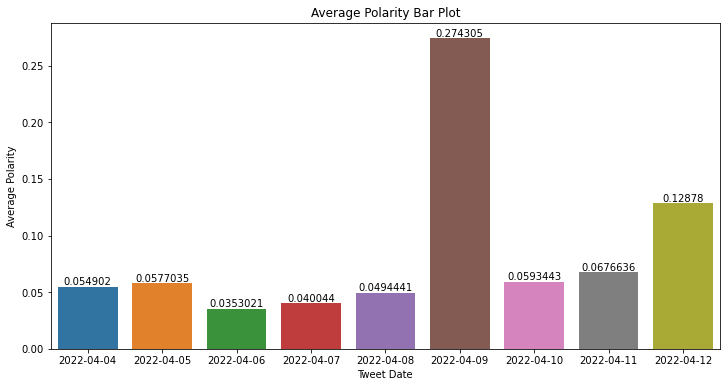

In [816]:
import seaborn as sns
plt.figure(figsize=(12,6))
ax2 = sns.barplot(x="date", y="average_polarity",order = twitter_dataframe["date"].sort_values().unique(), 
                  data=twitter_dataframe)
plt.title('Average Polarity Bar Plot')
plt.xlabel('Tweet Date')
plt.ylabel('Average Polarity')
ax2.bar_label(ax2.containers[0])

5b. Lineplot - Tweet count per day.<br>
Querying postgreSQL twitter table to fetch total Tweets per day<br>

In [631]:
import pandas.io.sql as sqlio
import psycopg2

sql = """
SELECT
  created_date as Date,
  count(cleaned_text) as count_Tweets
FROM
  twitter
GROUP BY
  Date;"""

try:
    dbConnection = psycopg2.connect(
        user = "dap",
        password = "dap",
        host = "127.0.0.1",
        port = "5433",
        database = "twitter"
    )
    twitter_dataframe2 = sqlio.read_sql_query(sql, dbConnection)
except (Exception , psycopg2.Error) as dbError :
    print ("Error:", dbError)
finally:
    if "dbConnection" in locals(): 
        dbConnection.close()

In [634]:
twitter_dataframe2

date  count_tweets
0  2022-04-04           408
1  2022-04-07          1137
2  2022-04-09          1389
3  2022-04-12          5974
4  2022-04-05           688
5  2022-04-06           960
6  2022-04-08          1547
7  2022-04-10           671
8  2022-04-11          1100

Creating a sns Lineplot to show Total Tweet counts sorted by date with value.

Text(0, 0.5, 'Tweet Counts')

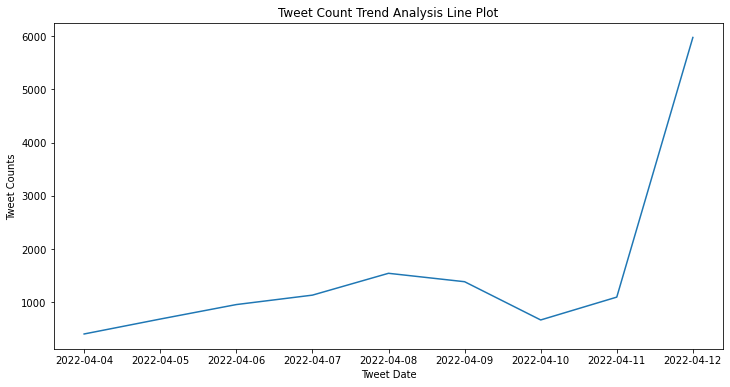

In [762]:
import seaborn as sns
plt.figure(figsize=(12,6))
ax = sns.lineplot(x="date", y="count_tweets",data=twitter_dataframe2)
plt.title('Tweet Count Trend Analysis Line Plot')
plt.xlabel('Tweet Date')
plt.ylabel('Tweet Counts')

5c. Word Cloud plot, showing top words on all Tweets.<br>

In [755]:
# Plot the word cloud 
allwords=' '.join([tweets for tweets in twitter_full_dataframe['tweettext']])
wordCloud=WordCloud(width=500,height=500).generate(allwords)

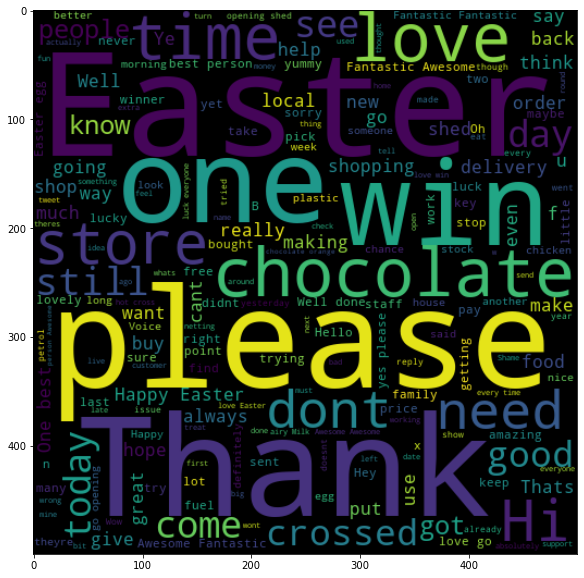

In [770]:
plt.figure(figsize=(16,10))
plt.imshow(wordCloud,interpolation='bilinear')
plt.show()

5d. Word Cloud plot, showing top words on all Positive and Negative Tweets only.<br>

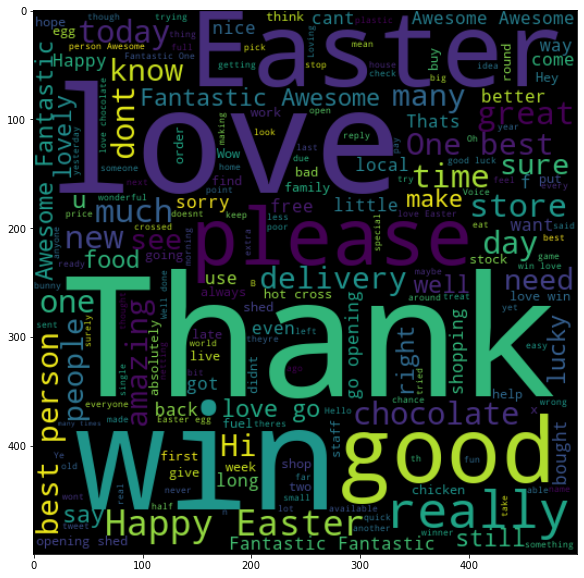

In [777]:
# Plot the word cloud 
allwords=' '.join([tweets for tweets in twitter_full_dataframe['tweettext'][twitter_full_dataframe['sentiment']!="Neutral"]])
wordCloud=WordCloud(width=500,height=500).generate(allwords)

plt.figure(figsize=(16,10))
plt.imshow(wordCloud,interpolation='bilinear')
plt.show()

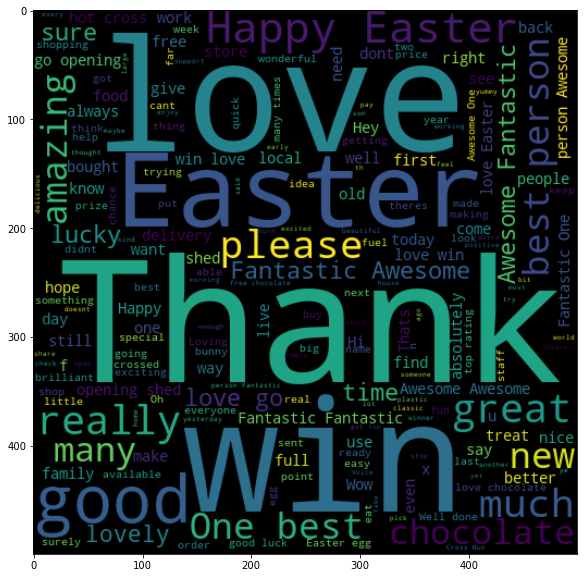

In [17]:
# Plot the word cloud on postive tweet
all_positive_words=' '.join([tweets for tweets in twitter_full_dataframe['tweettext'][twitter_full_dataframe['sentiment']=="Positive"]])
wordCloudPositive=WordCloud(width=500,height=500).generate(all_positive_words)

plt.figure(figsize=(16,10))
plt.imshow(wordCloudPositive,interpolation='bilinear')
plt.show()

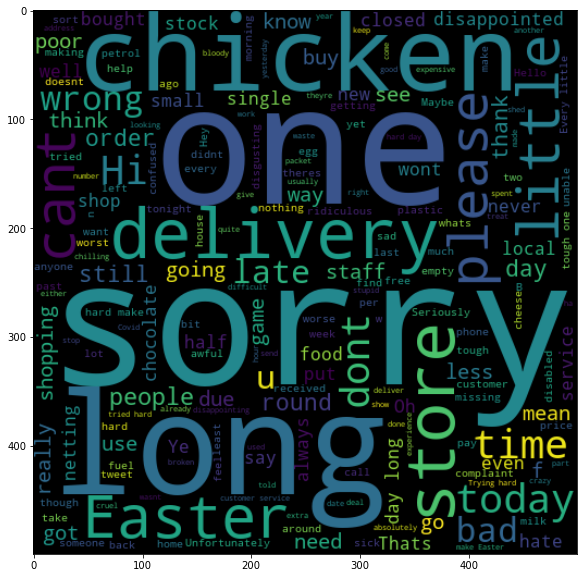

In [18]:
# Plot the word cloud on Negative tweet
all_negative_words=' '.join([tweets for tweets in twitter_full_dataframe['tweettext'][twitter_full_dataframe['sentiment']=="Negative"]])
wordCloudNegative=WordCloud(width=500,height=500).generate(all_negative_words)

plt.figure(figsize=(16,10))
plt.imshow(wordCloudNegative,interpolation='bilinear')
plt.show()

5e. Funnelplot - Showing Top 10 words on all Tweets.<br>

In [9]:
wordlist=[]
for tweets in twitter_full_dataframe['tweettext']:
    word= re.findall(r"(\w+)",tweets)
    wordlist.append(word)

In [10]:
wordlist[:5]

[[],
 ['eat', 'luscious', 'filling', 'first'],
 ['Thanks'],
 ['without', 'doubt'],
 ['ACTOR', 'Pac', 'man', 'game', 'sweet']]

In [11]:
combinedwordlist=sum(wordlist,[])

In [12]:
combinedwordlist[:10]

['eat',
 'luscious',
 'filling',
 'first',
 'Thanks',
 'without',
 'doubt',
 'ACTOR',
 'Pac',
 'man']

In [13]:
frequency = nltk.FreqDist(combinedwordlist)
data = pd.DataFrame({'word': list(frequency.keys()),
                     'Count': list(frequency.values())})


In [14]:
data.head()

word  Count
0       eat     46
1  luscious      1
2   filling     12
3     first     54
4    Thanks    145

In [15]:
import plotly.express as px

top10word = data.nlargest(columns='Count',n=10)
ax3=px.funnel(top10word,x='word',y='Count')
ax3.show()

5f. Pieplot - On overall sentiments Postive,Negative, Neutral.<br>

Display total Count of tweets by sentiment

In [758]:
twitter_full_dataframe['sentiment'].value_counts()

Neutral     8495
Positive    4079
Negative    1300
Name: sentiment, dtype: int64

Sentiment score plotted on Pie Chart

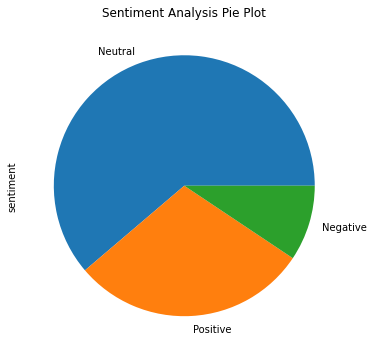

In [814]:
plt.figure(figsize=(12,6))
plt.title('Sentiment Analysis Pie Plot')
twitter_full_dataframe['sentiment'].value_counts().plot(kind='pie')
plt.show()

5g.  Scatter Plot - Polarity versus Subjectivity

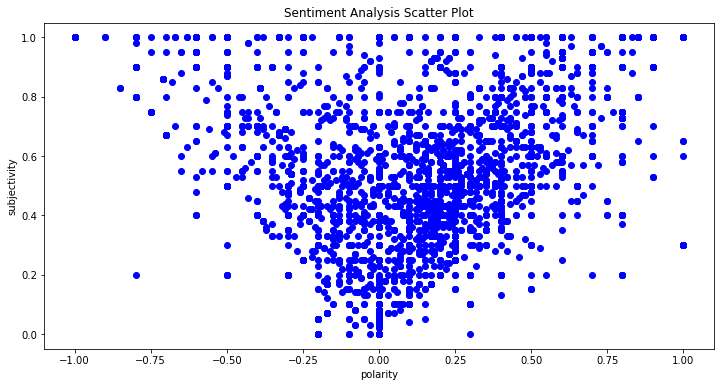

In [768]:
plt.figure(figsize=(12,6))
plt.scatter(twitter_full_dataframe['polarity'],twitter_full_dataframe['subjectivity'],color="Blue")

plt.title('Sentiment Analysis Scatter Plot')
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.show()